In [156]:
##Bostoon house pric prediction by Linear Regression ML


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.datasets import fetch_california_housing

In [7]:
df = fetch_california_housing()

In [8]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [9]:
## lets check description of dataset
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [10]:
x = pd.DataFrame(df['data'],columns = df['feature_names'])

In [11]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
y = pd.DataFrame(df['target'],columns = df['target_names'])

In [13]:
y.sample()

,MedHouseVal
7155,1.946


In [14]:
df = pd.concat([x,y],axis = 1)

In [15]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20006,3.1528,21.0,6.104839,1.010753,1145.0,3.077957,36.13,-119.08,1.137
10580,2.8850,9.0,5.323108,1.014315,4660.0,4.764826,33.71,-117.82,1.625
4146,4.0052,30.0,4.237736,1.036478,2032.0,2.555975,34.13,-118.20,1.964
2396,3.0729,34.0,26.041096,5.397260,171.0,2.342466,37.11,-119.28,1.446
5717,5.5756,41.0,4.542857,0.993407,1282.0,2.817582,34.20,-118.24,3.099


In [16]:
df['price'] = pd.DataFrame(df['MedHouseVal'])

In [17]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,price
4704,3.9167,52.0,5.634744,1.020045,1122.0,2.498886,34.05,-118.34,3.216,3.216
2032,1.8723,46.0,5.044944,1.056180,854.0,3.198502,36.73,-119.76,0.526,0.526
19798,1.8696,23.0,5.427861,1.079602,539.0,2.681592,40.54,-123.12,0.615,0.615
15827,3.0000,52.0,4.181818,1.058824,1162.0,3.106952,37.75,-122.42,2.750,2.750
16340,4.6477,15.0,7.434615,1.076923,965.0,3.711538,38.04,-121.33,1.427,1.427


In [18]:
df = df.drop('MedHouseVal' , axis = 1)

In [19]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
9294,3.9519,17.0,4.510129,0.987109,1157.0,2.130755,38.00,-122.51,2.742
20192,2.3750,31.0,2.545455,1.000000,326.0,3.704545,34.26,-119.21,0.550
11882,2.1151,43.0,4.240000,1.143704,1878.0,2.782222,33.98,-117.37,0.967
16053,4.1397,52.0,5.474777,0.997033,1015.0,3.011869,37.76,-122.48,3.313
3308,1.7083,11.0,7.976744,1.476744,246.0,2.860465,38.95,-122.63,0.773


In [20]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [21]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## we will do EDA(exploratory data analysis)
## correlation

In [22]:
df.corr(numeric_only = True)['price']

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
price         1.000000
Name: price, dtype: float64

##after analyze make plt plot for output and specific column input 

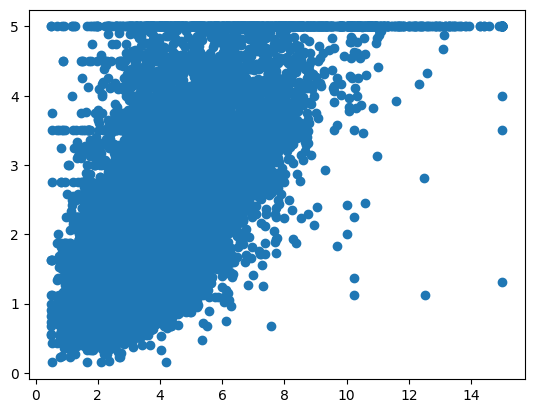

In [23]:
plt.scatter(x = df['MedInc'], y = df['price'])

## make linearregressio line by seaborn

<Axes: xlabel='MedInc', ylabel='price'>

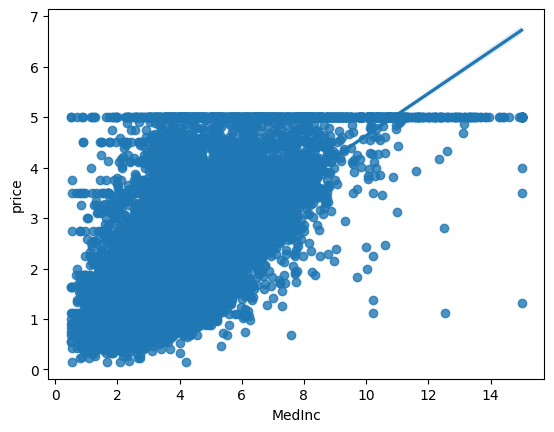

In [24]:
sbn.regplot(x=df['MedInc'] , y=df['price'])

<Axes: xlabel='AveRooms', ylabel='price'>

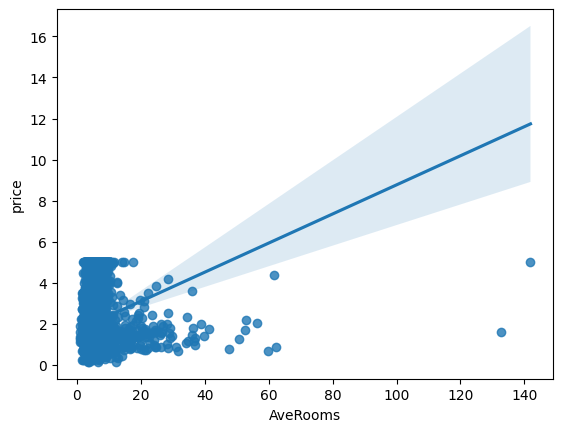

In [25]:
sbn.regplot(x = df['AveRooms'] , y = df['price'])

## divide into independent and dependent feature

In [26]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
x.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12194,3.8056,7.0,6.59934,1.12366,7139.0,2.942704,33.63,-117.29


In [28]:
y.sample()

19703    1.107
Name: price, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## satndardizing the datascale

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

## model_training

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lin_reg = LinearRegression()

In [36]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [37]:
## print the coefficiend and intercept
print(lin_reg.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [38]:
##print intercept
print(lin_reg.intercept_)

2.0692396089424165


In [39]:
##on which parameters model has been trained
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

##prediction with test data

In [40]:
reg_pred = lin_reg.predict(x_test)

In [41]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133], shape=(6192,))

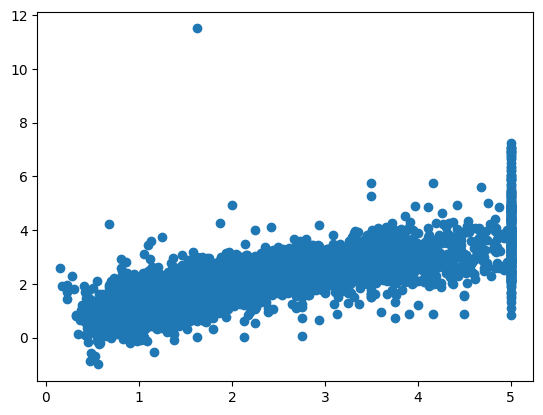

In [42]:
plt.scatter(y_test,reg_pred)

In [43]:
residual = y_test - reg_pred

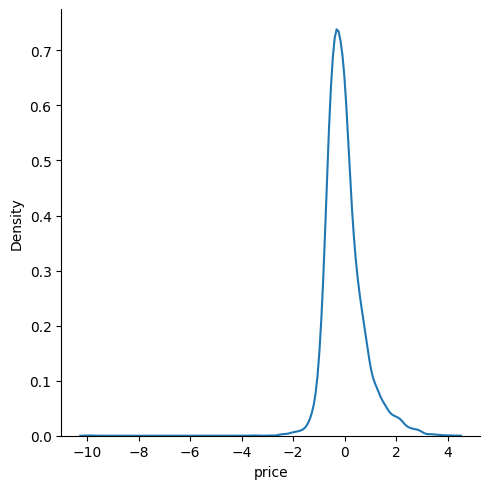

In [44]:
sbn.displot(residual , kind = 'kde')

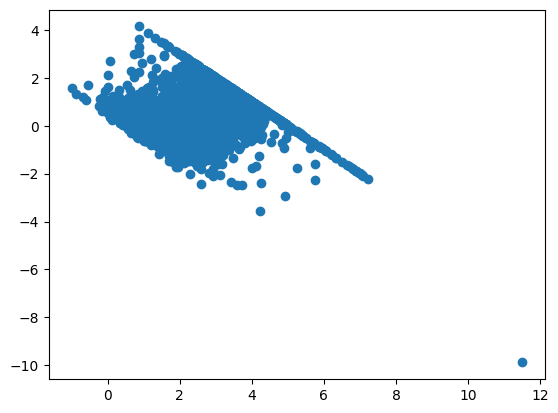

In [45]:
## scatter plot with respect to prediction and residual
##uniform distribution
plt.scatter(reg_pred,residual)

##for sure use performance matrix like MSE Rsquare RMSE etc.

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5305677824766754
0.5272474538305952
0.7284008391515453


#R square and adjusted R square

In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
score

0.5957702326061662

##Adusted R^2 

Adusted R^2 = 1-[(1-R^2)*(n-1)/(n-k-1)]
R2: The R2 model : n=The number of observation k: the number of predictor variable

In [48]:
adjusted_R2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [49]:
adjusted_R2

0.5952472117200025

##new data prediction

In [50]:
data = fetch_california_housing()
data.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [51]:
scaler.transform(data.data[0].reshape(1,-1))

/Users/dhrutamacm2/Desktop/California-House-predict/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [52]:
lin_reg.predict(scaler.transform(data.data[0].reshape(1,-1)))

/Users/dhrutamacm2/Desktop/California-House-predict/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

In [ ]:
import pickle

: 

In [ ]:
pickle.dump(lin_reg,open('regmodel.pkl','wb'))

: 

In [ ]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

: 

In [ ]:
pickled_model.predict(scaler.transform(data.data[0].reshape(1,-1)))

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

: 

: 